Dataset Link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [ ]:
import pandas as pd

df = pd.read_csv("/content/WineQT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving WineQT.csv to WineQT (1).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()
print(df.describe())
df['quality'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
       fixed acidity  volatile acidity  citric acid  residual sugar  \
coun

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [ ]:
X = df.drop(['quality','Id'], axis=1)
y = df['quality']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))


Random Forest Accuracy: 0.6943231441048034
SGD Accuracy: 0.6026200873362445
SVC Accuracy: 0.6375545851528385


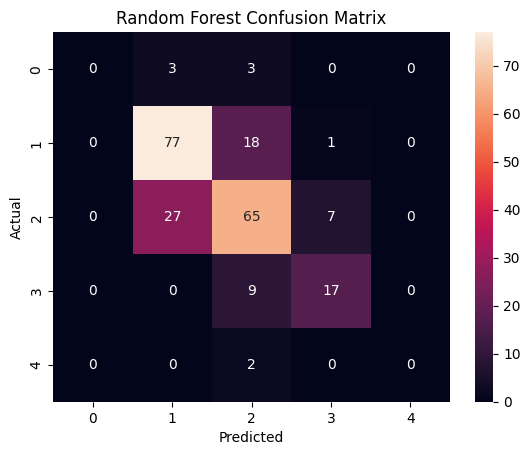

In [ ]:
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
10,alcohol,0.146276
9,sulphates,0.119159
1,volatile acidity,0.110288
6,total sulfur dioxide,0.101212
7,density,0.090431
4,chlorides,0.082482
0,fixed acidity,0.073160
2,citric acid,0.072021
8,pH,0.070924
5,free sulfur dioxide,0.068906


In [ ]:
def predict_wine_quality():
    print("\n🍷 Enter Wine Chemical Properties (Press Enter to use sample values)\n")
    print("📏 Quality Scale Used: 3–8 (3=Very Bad, 5=Average, 8=Excellent)\n")

    fixed_acidity = float(input("Fixed Acidity [7.4]: ") or 7.4)
    volatile_acidity = float(input("Volatile Acidity [0.7]: ") or 0.7)
    citric_acid = float(input("Citric Acid [0.0]: ") or 0.0)
    residual_sugar = float(input("Residual Sugar [1.9]: ") or 1.9)
    chlorides = float(input("Chlorides [0.076]: ") or 0.076)
    free_sulfur_dioxide = float(input("Free Sulfur Dioxide [11]: ") or 11)
    total_sulfur_dioxide = float(input("Total Sulfur Dioxide [34]: ") or 34)
    density = float(input("Density [0.9978]: ") or 0.9978)
    ph = float(input("pH [3.51]: ") or 3.51)
    sulphates = float(input("Sulphates [0.56]: ") or 0.56)
    alcohol = float(input("Alcohol [9.4]: ") or 9.4)

    input_data = pd.DataFrame([[
        fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
        chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
        ph, sulphates, alcohol
    ]], columns=X.columns)

    input_scaled = scaler.transform(input_data)
    quality = int(rf.predict(input_scaled)[0])

    if quality <= 4:
        label = "❌ Poor Quality – Not Drinkable"
    elif quality == 5:
        label = "⚠ Average – Drinkable"
    elif quality == 6:
        label = "🙂 Good – Enjoyable"
    elif quality == 7:
        label = "😄 Very Good – High Quality"
    else:
        label = "🏆 Excellent – Premium Wine"

    print("\n🍷 Predicted Quality Score:", quality)
    print("📊 Wine Rating:", label)


In [ ]:
predict_wine_quality()



🍷 Enter Wine Chemical Properties (Press Enter to use sample values)

📏 Quality Scale Used: 3–8 (3=Very Bad, 5=Average, 8=Excellent)

Fixed Acidity [7.4]: 6
Volatile Acidity [0.7]: 0.7
Citric Acid [0.0]: 0.5
Residual Sugar [1.9]: 1.9
Chlorides [0.076]: 0.77
Free Sulfur Dioxide [11]: 10
Total Sulfur Dioxide [34]: 35
Density [0.9978]: 0.99
pH [3.51]: 2.8
Sulphates [0.56]: 0.6
Alcohol [9.4]: 9

🍷 Predicted Quality Score: 5
📊 Wine Rating: ⚠ Average – Drinkable


**WINE QUALITY INSIGHTS**

Alcohol, sulphates and volatile acidity are top predictors.

Random Forest outperforms SGD and SVC.

Chemical composition strongly influences perceived quality.

**APPLICATION**

• Helps vineyards maintain quality standards.
• Assists manufacturers in chemical tuning.
• Supports automated wine grading systems.